## Example

### 1. Load model

In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
from LinearRegression import LinearRegression

### 2. Generate dataset

In [22]:
# params to predict
COEF = np.array([2.]).reshape((-1, 1))
INTERC = np.array([-1.])

# generate noized data
def F(x, MU = 0., SIGMA = 0.):
    return x  @  COEF + INTERC + np.random.normal(MU, SIGMA, x.shape)

In [23]:
A, B = -2, 10

X = np.linspace(A, B, 200).reshape((-1, 1))
Y = F(X, 0, 1)
GivenY = F(np.array([[A], [B]]))

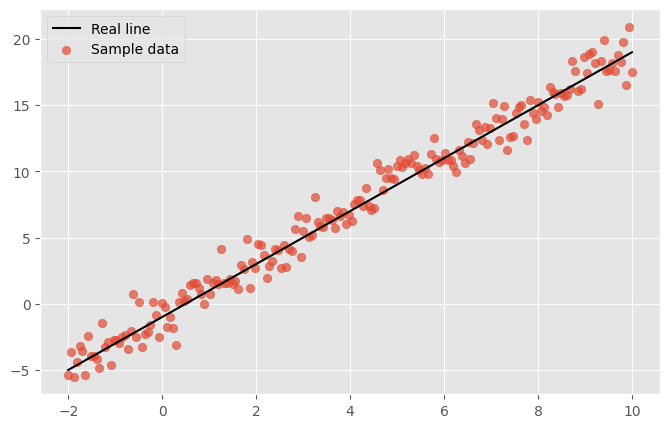

In [24]:
fg, ax = plt.subplots(1,1, figsize=(8, 5), dpi=100)
ax.plot([A, B], np.squeeze(GivenY), 'k', alpha = 1, label='Real line')
ax.scatter(X, Y, alpha = 0.7, label='Sample data')
ax.legend()

### 3. Create & fit model

In [25]:
mod_eq = LinearRegression() 
mod_it = LinearRegression()

# fit with equation
mod_eq.fit(X, Y)

# fit with iterative algirithm
mod_it.fit(X, Y,  
        method='iterative', 
        max_iters=1000, 
        eps=1e-99,  
        learning_rate=0.01, 
        momentum=True, 
        nesterov=True, 
        beta=0.99)

(array([[1.98520248]]), array([-0.76721875]))

#### 3.1 Check $R^2$ scores

In [26]:
mod_eq.score(X, Y), mod_it.score(X, Y)

(0.9783988441168914, 0.9783921708109954)

#### 3.2 Visualize out

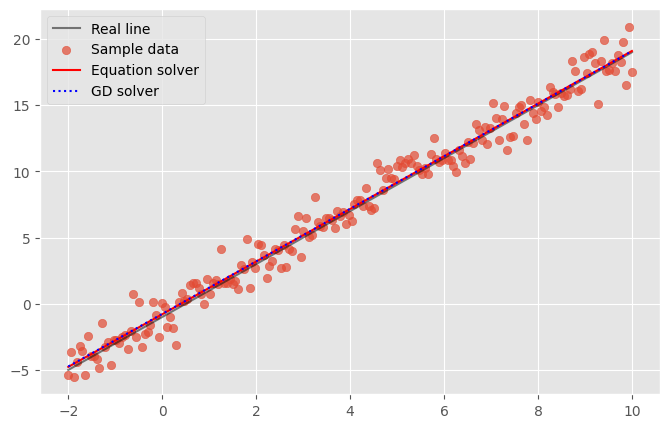

In [27]:
fg, ax = plt.subplots(1,1, figsize=(8, 5), dpi=100)
ax.plot([A, B], np.squeeze(GivenY), 'k', alpha = 0.5, label='Real line')
ax.scatter(X, Y, alpha = 0.7, label='Sample data')

ax.plot([A, B], mod_eq.predict([A,B]), 'r', alpha = 1, label='Equation solver')
ax.plot([A, B], mod_it.predict([A,B]), 'b:', alpha = 1, label='GD solver')

ax.legend()

### 4. Test with advanced dataset

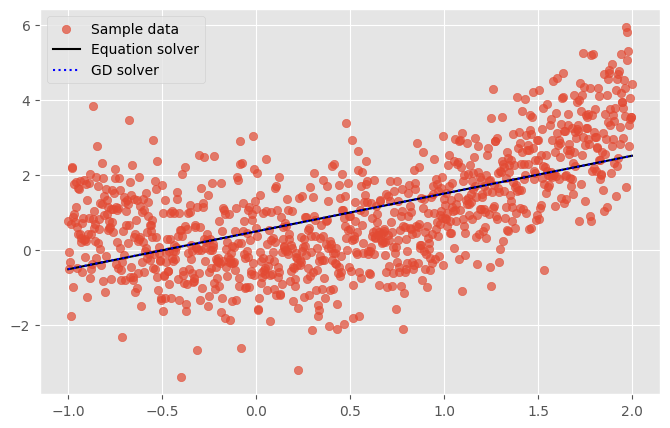

In [32]:
a, b = -1, 2
X = np.linspace(a, b, 1000).reshape((1000, 1))
Y = np.square(X) + np.random.normal(0, 1, (1000, 1))

# fit with equation
mod_eq_adv = LinearRegression()
mod_eq_adv.fit(X, Y)

# fit with iterative algirithm
mod_it_adv = LinearRegression()
mod_it_adv.fit(X, Y, method='iterative', max_iters=1000, eps=1e-99, learning_rate=0.01, momentum=True, nesterov=True, beta=0.99)

fg, ax = plt.subplots(1,1, figsize=(8, 5), dpi=100)
ax.scatter(np.squeeze(X), Y, alpha = 0.7, label='Sample data')

ax.plot([a, b], mod_eq_adv.predict([a, b]), 'k', alpha = 1, label='Equation solver')
ax.plot([a, b], mod_it_adv.predict([a, b]), 'b:', alpha = 1, label='GD solver')

ax.legend()